# KNN (k- Nearest Neighbors)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [3]:
df.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


- 1 = Basic Service
- 2 = E-Service
- 3 = Plus Service
- 4 = Total Service

In [4]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

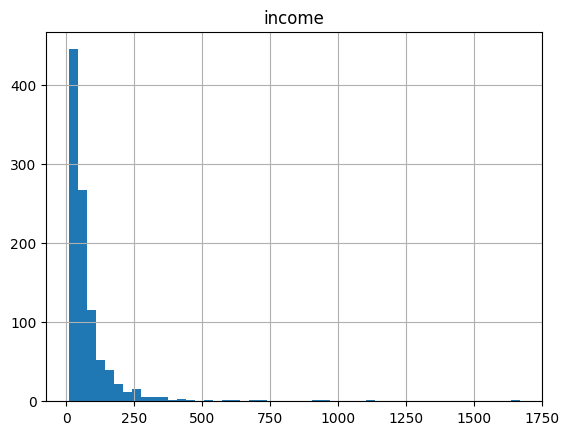

In [5]:
df.hist(column="income", bins=50)

In [6]:
age = df['age']
income = df['income']

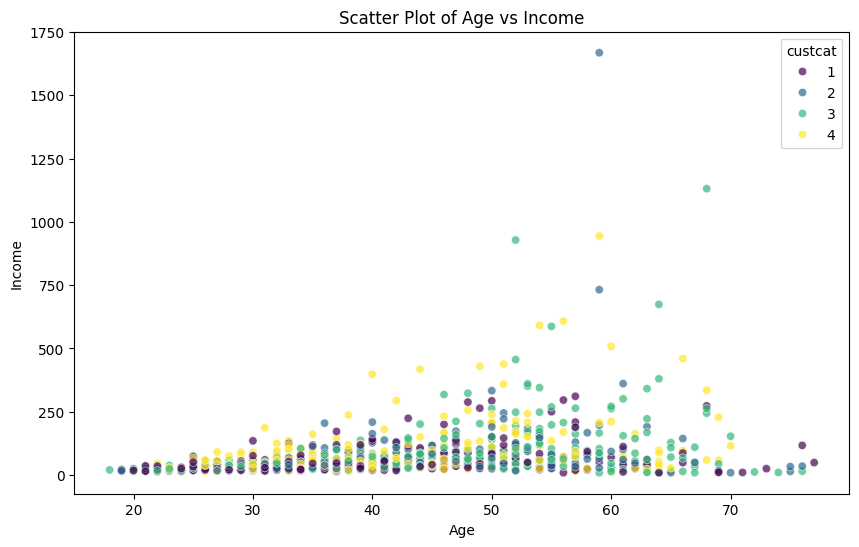

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=age, y=income, hue=df['custcat'], palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


 1- Pick a value for K
 2- Calculate the distance of unknown case from all cases.(dissimilarity)
 3- Select the K-observation in the trainning data that are "nearest" to the unknown data point.
 4- Predict thr response of the unknown data point,using the most popular response value from the K-nearest neigbors.

For unknown case,first pick K=1
Calculate and make prediction until K=20
Compare results.
- K=1 may capture the noise in data.Alow value of K causes over-fitting.Prediction is not good enough for out-of- cases.
- K=20 The model becomes overly generalized,if value of K is too high.

- If we use 2 features (age, income), we are using it in a 2-dimensional space.
- We can also use the same distance matrix for multi-dimensional vectors.


# Exercise

- Normalize the data: StandardScaler
- Classification:KNeighborsClassifier
- Training:k=4
- Evalution:accuracy_score

# Solution:

In [8]:

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:, 1 :],df.iloc[:, 0 ],test_size= 0.2 ,random_state= 2 )

In [9]:
#Scikit-learn'deki sınıf standardizasyonu gerçekleştirir .
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [10]:
# Scikit Learn Kütüphanesinden bir kNN modelini import ediyoruz.
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#Knn modelini başlat
knn=KNeighborsClassifier(n_neighbors=4)

In [12]:
#eğitim verimizi X_train modelimize sığdırıyoruz, y_train eğitim verimizdir.
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
from sklearn.metrics import accuracy_score
#gerçek test sonucuna göre doğruluk puanını hesaplıyoruz ve 
#test sonuçlarını tahmin ediyoruz.
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.355

# Exercise Solution:

In [20]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [66]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values

In [67]:
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [68]:
y=df['custcat'].values

In [69]:
y[0:5]

array([1, 4, 3, 1, 3])

# Normalize data

In [70]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [73]:
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

 # train/test split

In [54]:
from sklearn.model_selection import train_test_split
#train/test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [74]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification

In [75]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [76]:
neigh

KNeighborsClassifier(n_neighbors=4)

# Prediction

In [77]:
y_hat=neigh.predict(X_test)
y_hat[0:5]

array([1, 1, 3, 2, 4])

# Accuracy Evaulation

In [78]:
from sklearn import metrics
print("Train set accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, y_hat))

Train set accuracy: 0.5475
Test set accuracy: 0.32


In [79]:
# Check other Ks

k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


# Check accuracy of Ks

In [80]:
from sklearn import metrics
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # train and prediction for each k
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [81]:
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

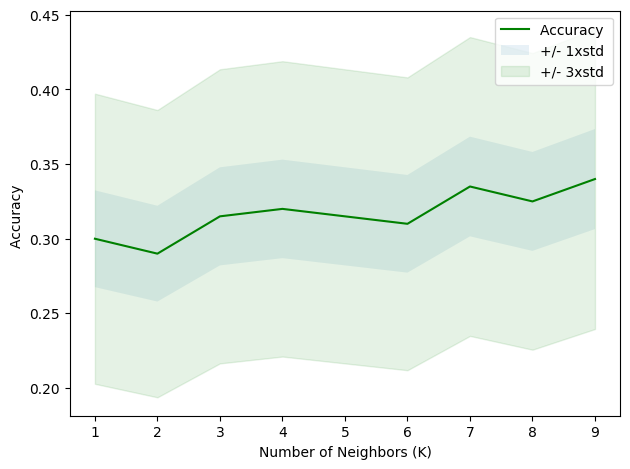

In [82]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [83]:
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy 0.34 with k= 9


Practice
Implement the K-Nearest Neighbors (KNN) model using a different dataset.
Research on evaluation metrics applicable to KNN. (Jaccard index, log loss, F1-score)
Blog post about model evaluation techniques in machine learning.
Select a real-world dataset for your final project and conduct a preliminary analysis of the data. You are expected to present your preliminary findings and outline the planned steps for the project during the lesson scheduled for next Sunday.

Pratik
Farklı bir veri kümesi kullanarak K-En Yakın Komşular (KNN) modelini uygulayın.
KNN için geçerli değerlendirme metrikleri üzerine araştırma. (Jaccard endeksi, log kaybı, F1 puanı)
Makine öğreniminde model değerlendirme teknikleri hakkında blog yazısı.
Nihai projeniz için gerçek dünyadan bir veri kümesi seçin ve verilerin ön analizini yapın. Ön bulgularınızı sunmanız ve önümüzdeki Pazar günü yapılması planlanan ders sırasında proje için planlanan adımları özetlemeniz beklenir.